<a href="https://colab.research.google.com/github/amitgit2510/Info_miners_2/blob/Amit/Course_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.9 MB/s eta 0:00:00


In [3]:
# import category encoders
import category_encoders as ce

# import stats library
from scipy import stats

# import labelEncoder
from sklearn.preprocessing import LabelEncoder

# import train test split
from sklearn.model_selection import train_test_split,GridSearchCV

# import time library
import time

import statsmodels.api as sm

# import qqplot
from statsmodels.graphics.gofplots import qqplot

# import crossval
from sklearn.model_selection import cross_val_score

# import Stander Scaler
from sklearn.preprocessing import StandardScaler

# importing libraries to calculte errors of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

# import Regression libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor,SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# improt label_binarize library
from sklearn.preprocessing import label_binarize

# import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier
from xgboost import XGBClassifier

# import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import perfromance metrics
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score,cohen_kappa_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import silhouette_score, silhouette_samples


# import PCA library
from sklearn.decomposition import PCA

# import clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet


# # import warning library to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import rcParams


In [4]:
df = pd.read_csv("/content/drive/MyDrive/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv")
df.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [5]:
df.shape

(2622133, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [7]:
df.describe()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,2.622133e+06,2.617246e+06,2.617246e+06,2622133.0,2.619860e+06,2.619860e+06,2.622133e+06,2.622133e+06,2.622133e+06,2.617246e+06,1.951315e+06,4.881420e+05,2.622133e+06,2.622133e+06,2.622133e+06
mean,1.311066e+06,5.019051e+06,1.036953e+03,2010.0,1.919431e+02,1.121324e+02,4.069629e+02,1.016206e+01,1.948373e+00,1.266323e+06,1.569229e+06,2.213083e+06,3.103701e+02,2.945920e+04,1.186523e+04
std,7.569447e+05,2.249577e+06,6.448892e+02,0.0,1.565932e+02,8.761224e+01,2.404910e+02,5.923678e+00,8.986120e-01,8.226220e+06,9.379695e+06,1.225216e+07,9.769686e+02,5.640021e+04,2.727029e+04
min,0.000000e+00,1.010000e+05,1.000000e+00,2010.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.000000e-02,0.000000e+00
25%,6.555330e+05,2.951001e+06,5.410000e+02,2010.0,1.060000e+02,0.000000e+00,1.980000e+02,5.000000e+00,1.000000e+00,1.666590e+05,1.644990e+05,1.662850e+05,0.000000e+00,7.900000e+03,3.290510e+03
50%,1.311066e+06,5.907002e+06,1.117000e+03,2010.0,1.570000e+02,1.240000e+02,3.610000e+02,8.000000e+00,2.000000e+00,2.053620e+05,2.012870e+05,2.029570e+05,0.000000e+00,1.567373e+04,6.175350e+03
75%,1.966599e+06,7.002002e+06,1.450000e+03,2010.0,2.180000e+02,2.110000e+02,6.400000e+02,1.500000e+01,3.000000e+00,2.335610e+05,2.305590e+05,2.335750e+05,0.000000e+00,3.172352e+04,1.222803e+04
max,2.622132e+06,7.004010e+06,9.059000e+03,2010.0,6.700000e+02,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.100000e+07,9.900000e+03,1.206004e+07,1.470885e+07


In [8]:
df.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [9]:
df1 = df.loc[df["Source of Payment 2"].isnull() == True]
df1.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
16487,16487,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,122,F,Black/African American,...,NaN,NaN,149551.0,NaN,188988.0,0,N,Y,12603.78,3863.55
20572,20572,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,122,F,Black/African American,...,NaN,NaN,253677.0,NaN,NaN,0,N,Y,15405.80,5283.37
24833,24833,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,124,M,Black/African American,...,NaN,NaN,204436.0,151371.0,NaN,0,N,Y,36427.96,9428.54
30350,30350,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,134,F,White,...,NaN,NaN,213633.0,174586.0,234682.0,1900,N,N,17611.90,2909.55
31923,31923,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,OOS,M,White,...,NaN,NaN,216951.0,216951.0,NaN,0,N,N,33642.77,14668.58


In [10]:
df1['Source of Payment 1'].value_counts()

Insurance Company            247337
Medicaid                     213175
Blue Cross                   164620
Self-Pay                      85933
Medicare                      78238
CHAMPUS                        6064
Other Non-Federal Program      5659
Workers Compensation           5315
Other Federal Program          4027
Unknown                          13
Name: Source of Payment 1, dtype: int64

In [11]:
df['Source of Payment 2'].value_counts()

Medicaid                     580109
Self-Pay                     486614
Medicare                     326242
Insurance Company            239593
Blue Cross                   168306
CHAMPUS                        5770
Other Federal Program          3621
Other Non-Federal Program       845
Workers Compensation            353
Unknown                         299
Name: Source of Payment 2, dtype: int64

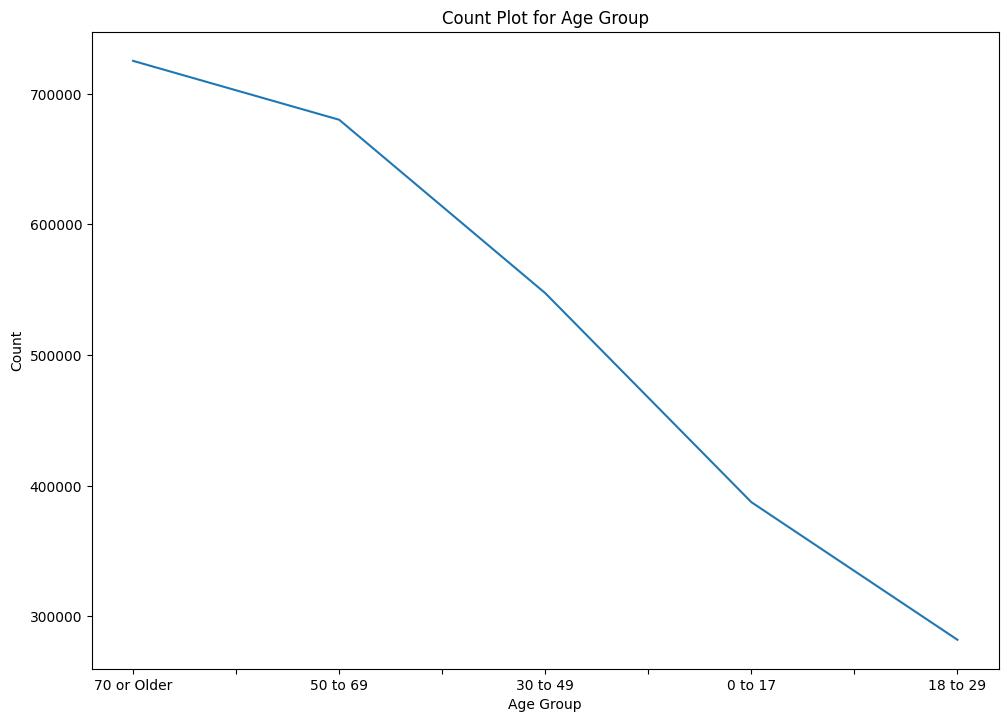

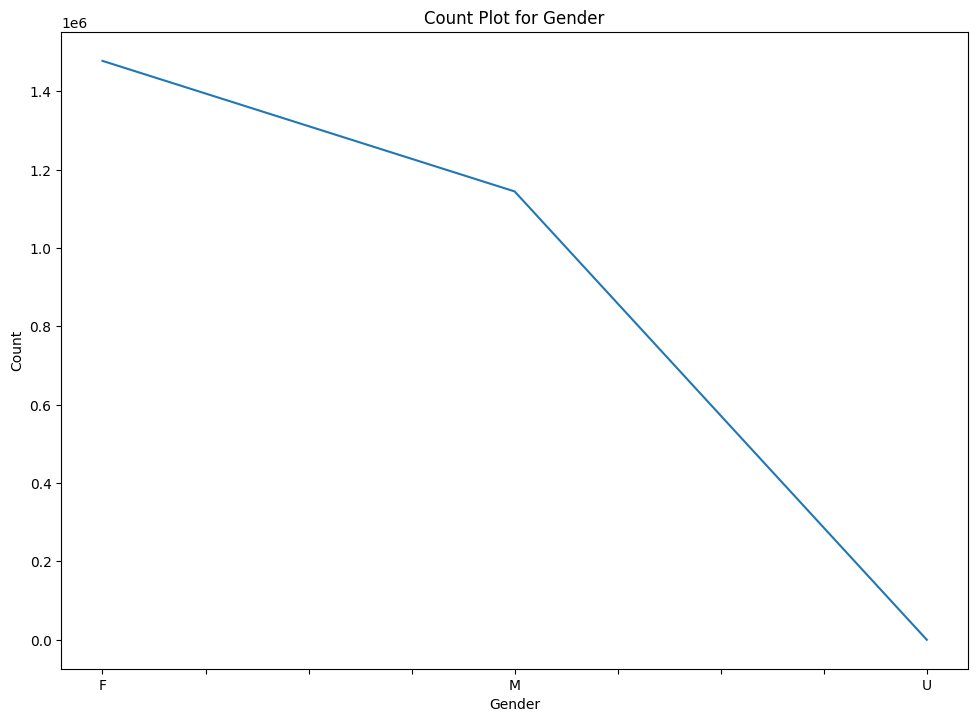

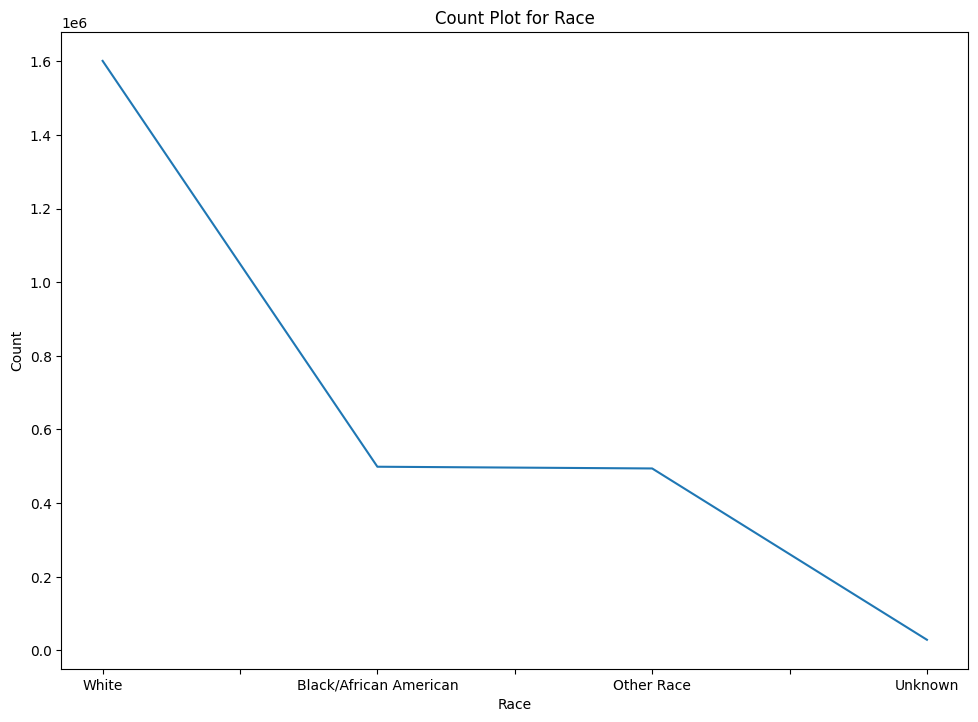

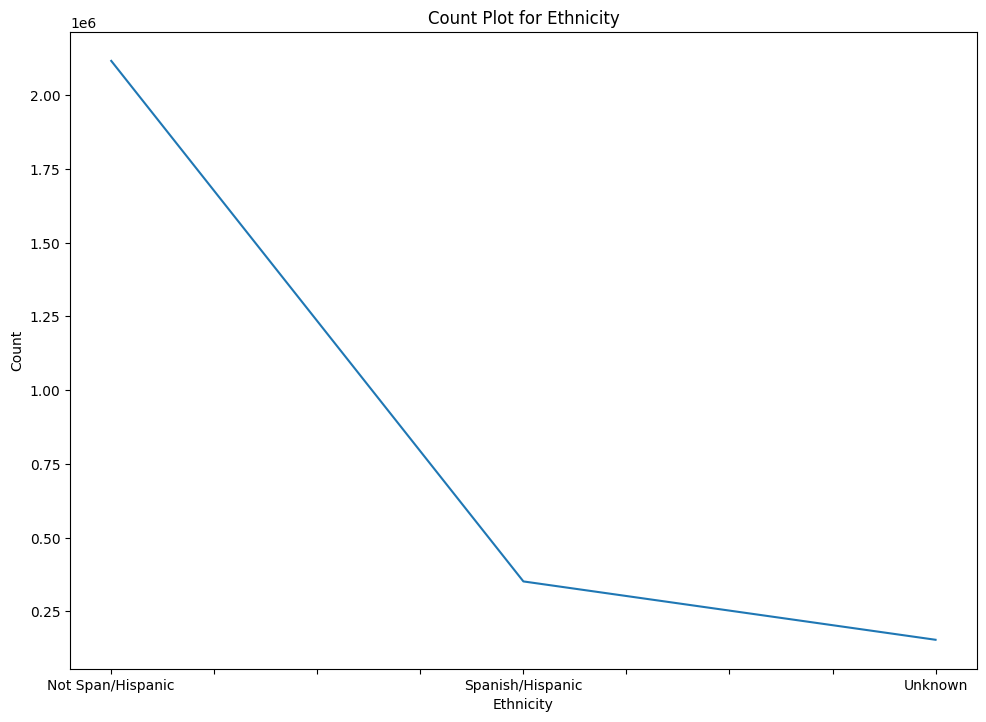

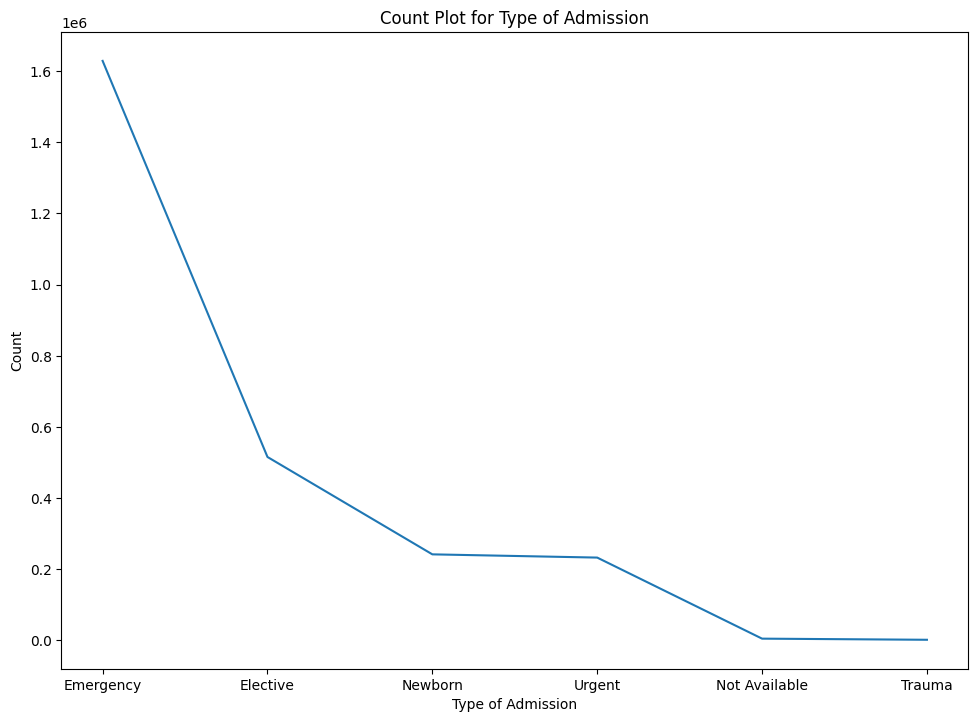

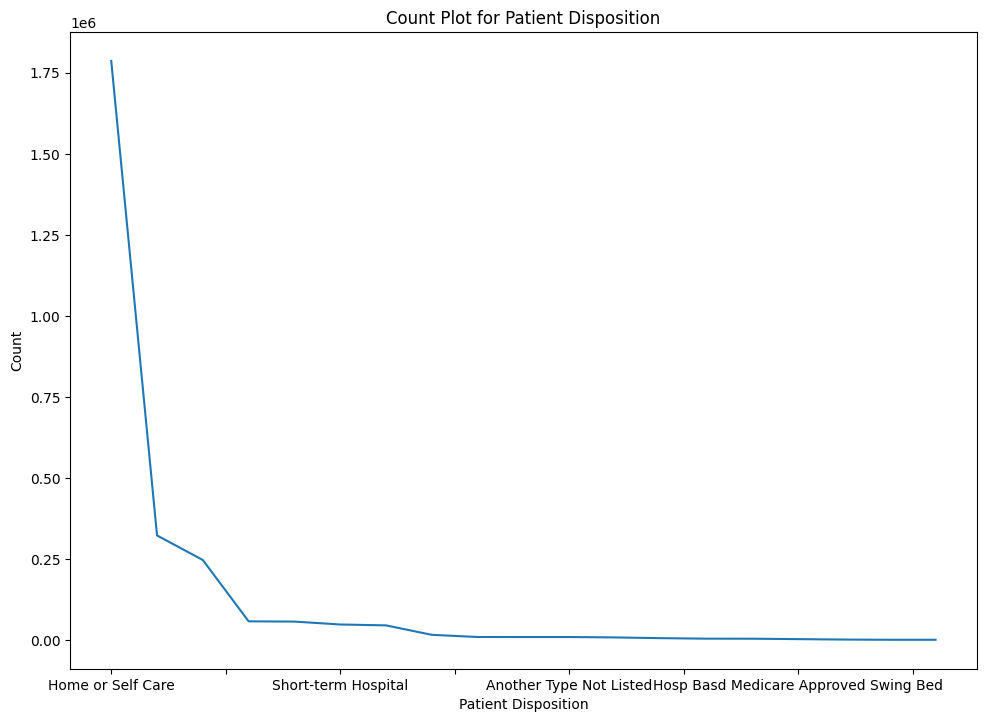

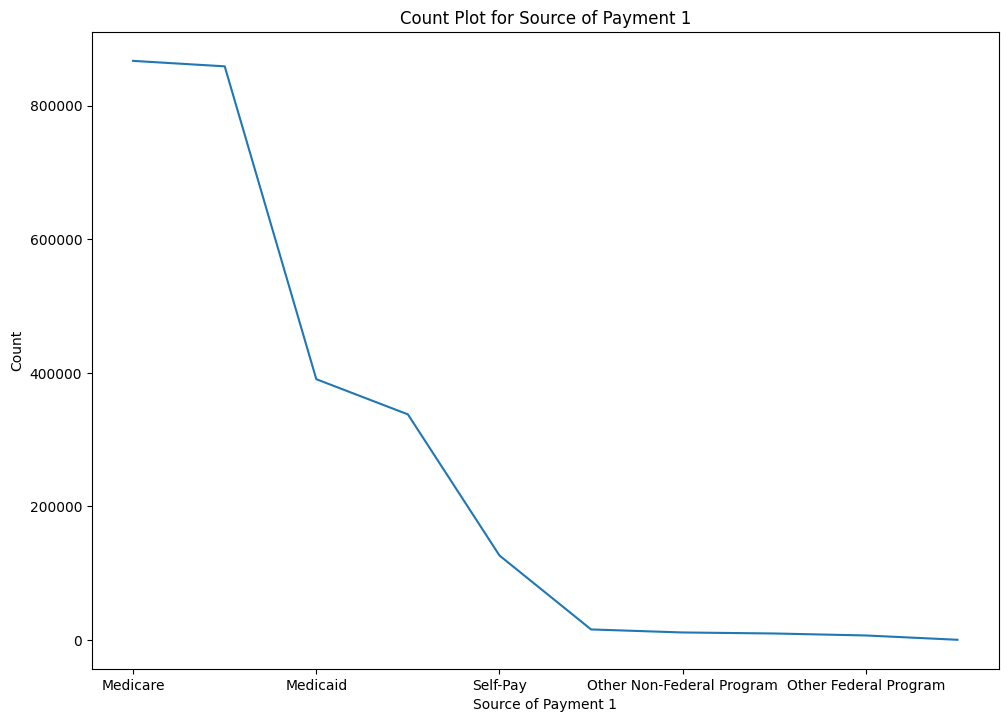

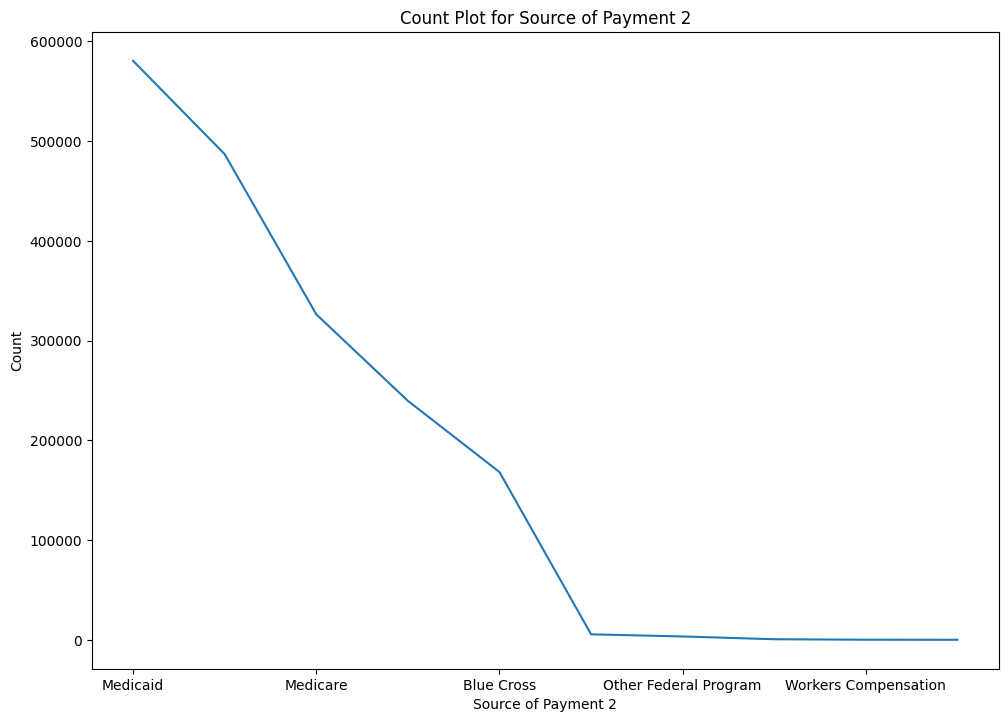

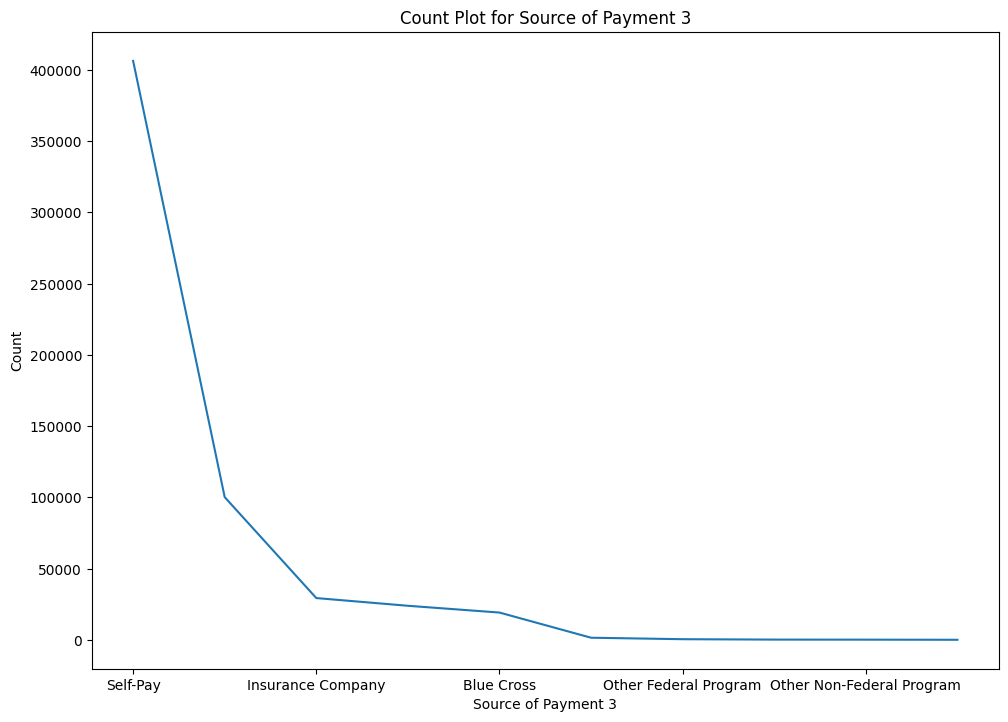

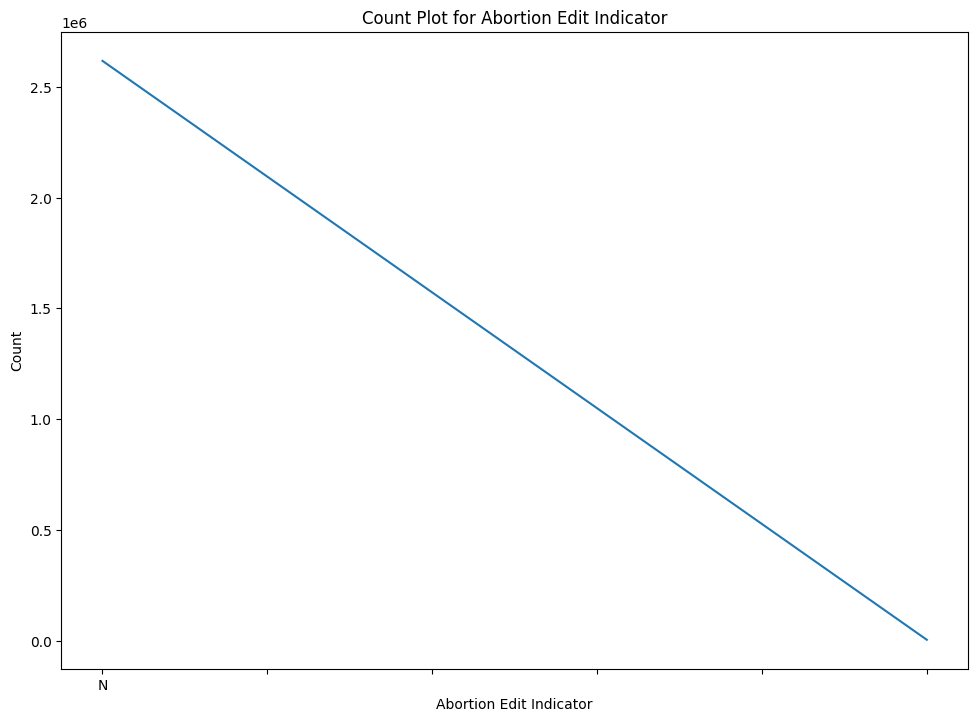

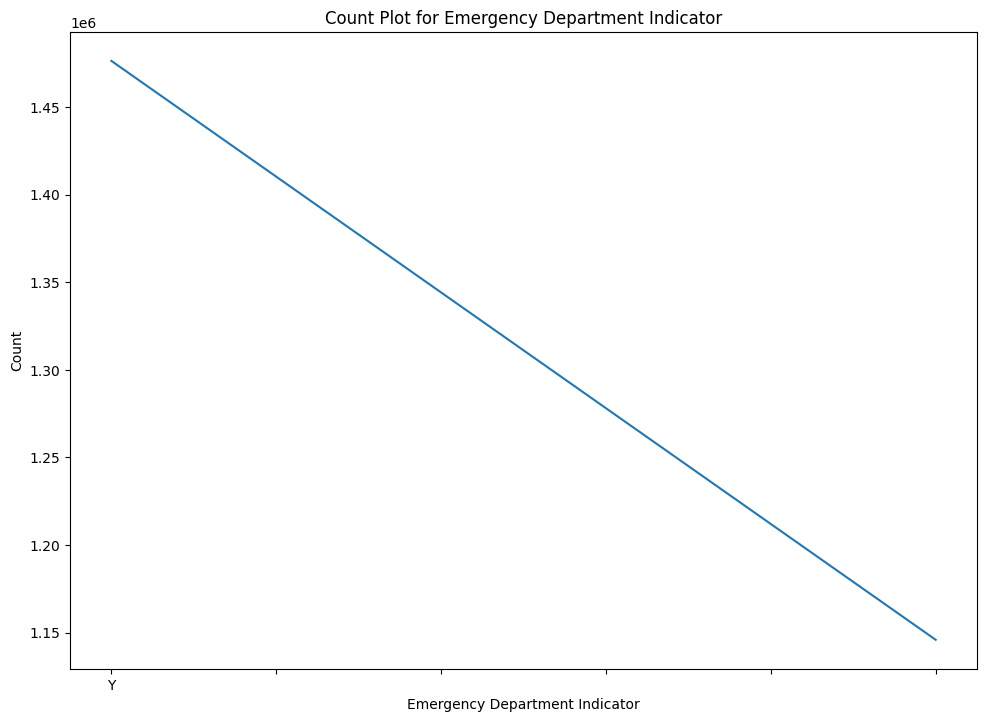

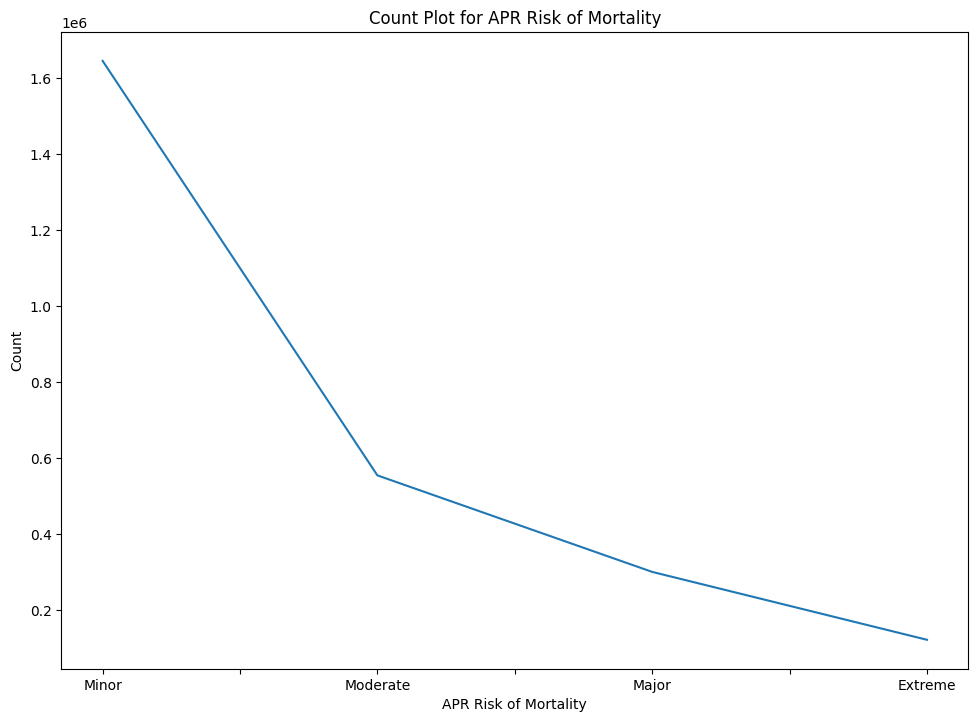

In [12]:
#Countplots for objects
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

object = ['Age Group', 'Gender', 'Race', 'Ethnicity','Type of Admission','Patient Disposition','Source of Payment 1','Source of Payment 2','Source of Payment 3','Abortion Edit Indicator','Emergency Department Indicator', 'APR Risk of Mortality']

for cat in object:
  df[cat].value_counts().plot()
  plt.xlabel(cat)
  plt.ylabel('Count')
  plt.title(f'Count Plot for {cat}')
  plt.show()

In [13]:
df['APR Risk of Mortality'].value_counts()

Minor       1644151
Moderate     554542
Major        300829
Extreme      122370
Name: APR Risk of Mortality, dtype: int64

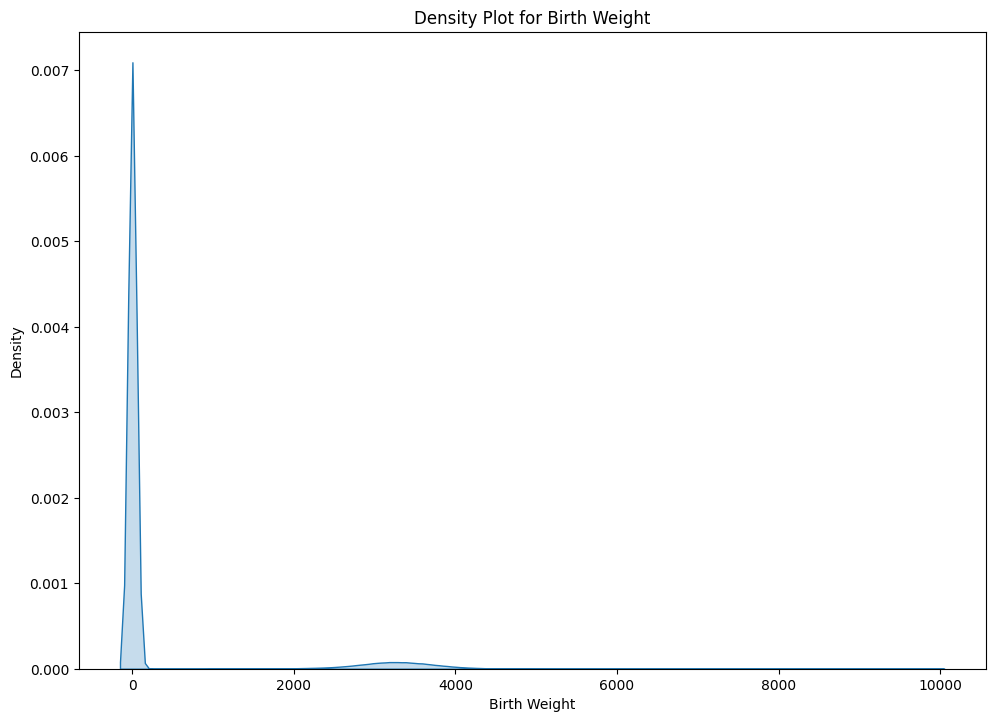

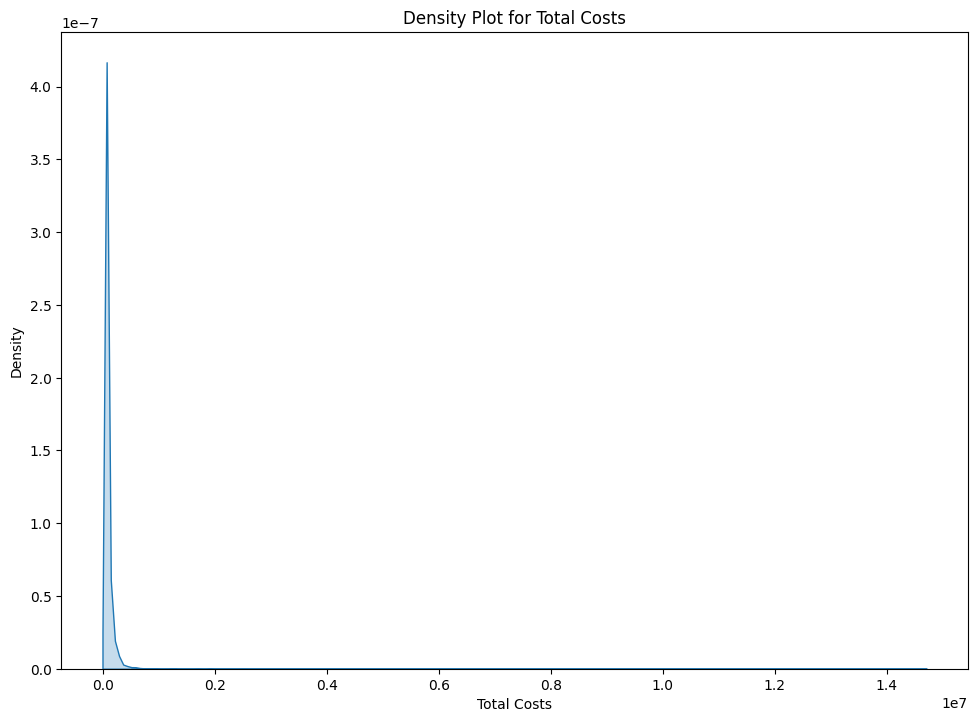

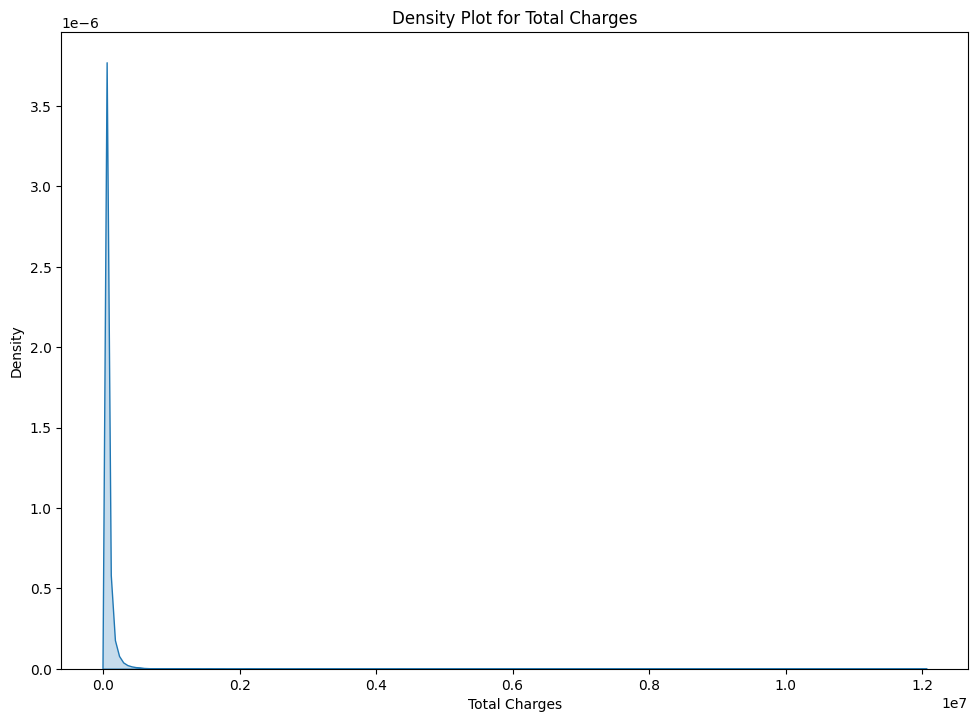

In [14]:
#Density plots for the features
num = ['Birth Weight', 'Total Costs', 'Total Charges']

for col in num:
  sns.kdeplot(data=df[col], label=col, shade = True)
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.title(f'Density Plot for {col}')
  plt.show()

In [15]:
numeric = ['Gender','Discharge Year', 'CCS Diagnosis Code', 'CCS Procedure Code', 'Total Charges', 'Total Costs', 'Birth Weight', "Length of Stay"]
df3 = pd.DataFrame(df[numeric])

In [16]:
object = df.select_dtypes('object').columns.to_list()
object

['Health Service Area',
 'Hospital County',
 'Facility Name',
 'Age Group',
 'Zip Code - 3 digits',
 'Gender',
 'Race',
 'Ethnicity',
 'Length of Stay',
 'Type of Admission',
 'Patient Disposition',
 'CCS Diagnosis Description',
 'CCS Procedure Description',
 'APR DRG Description',
 'APR MDC Description',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Source of Payment 1',
 'Source of Payment 2',
 'Source of Payment 3',
 'Abortion Edit Indicator',
 'Emergency Department Indicator']

In [17]:
df.corr()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
index,1.000000,0.876344,0.906865,NaN,0.004626,0.134145,0.040862,0.040572,-0.053251,0.000619,-0.035486,-0.080186,0.022471,0.057584,0.059875
Operating Certificate Number,0.876344,1.000000,0.747070,NaN,0.020378,0.137547,0.045278,0.045196,-0.051154,0.012031,-0.023388,-0.066738,0.014432,0.063992,0.074170
Facility ID,0.906865,0.747070,1.000000,NaN,0.010130,0.122196,0.046980,0.045777,-0.050174,-0.005738,-0.035690,-0.073875,0.039412,0.044957,0.050674
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.004626,0.020378,0.010130,NaN,1.000000,0.118982,0.484445,0.504995,-0.151896,0.041200,0.020183,0.032721,0.052272,-0.071353,-0.045825
CCS Procedure Code,0.134145,0.137547,0.122196,NaN,0.118982,1.000000,0.210290,0.207971,0.012771,0.001471,0.007062,-0.000350,0.145524,-0.001770,0.007290
APR DRG Code,0.040862,0.045278,0.046980,NaN,0.484445,0.210290,1.000000,0.971415,-0.119076,0.037951,0.036324,0.060269,0.301416,-0.087715,-0.061663
APR MDC Code,0.040572,0.045196,0.045777,NaN,0.504995,0.207971,0.971415,1.000000,-0.106844,0.039065,0.036230,0.062984,0.256083,-0.055312,-0.032033
APR Severity of Illness Code,-0.053251,-0.051154,-0.050174,NaN,-0.151896,0.012771,-0.119076,-0.106844,1.000000,-0.020712,-0.011650,-0.051742,-0.232027,0.331806,0.270896
Attending Provider License Number,0.000619,0.012031,-0.005738,NaN,0.041200,0.001471,0.037951,0.039065,-0.020712,1.000000,0.593437,0.446414,-0.012237,-0.016720,-0.007155


In [18]:
df4 = df.dropna()
df4.shape

(116312, 38)

In [19]:
df4.describe()

,index,Operating Certificate Number,Facility ID,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
count,1.163120e+05,1.163120e+05,116312.000000,116312.0,116312.000000,116312.000000,116312.000000,116312.000000,116312.000000,1.163120e+05,1.163120e+05,1.163120e+05,116312.000000,1.163120e+05,1.163120e+05
mean,1.548035e+06,5.961349e+06,1265.014031,2010.0,158.906011,144.255786,381.812117,9.542016,2.116652,1.499383e+06,1.790771e+06,1.889024e+06,326.081574,4.149087e+04,1.749268e+04
std,6.070502e+05,2.094302e+06,633.818170,0.0,103.105553,68.938660,226.572531,5.383716,0.959700,9.267327e+06,1.022351e+07,1.090886e+07,985.102027,7.106327e+04,3.492619e+04
min,2.500000e+01,1.010000e+05,1.000000,2010.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.069000e+03,7.260000e+02,1.100000e+01,0.000000,9.632100e+02,2.099300e+02
25%,1.428390e+06,7.000006e+06,1169.000000,2010.0,101.000000,76.000000,192.000000,5.000000,1.000000,1.619100e+05,1.624410e+05,1.621610e+05,0.000000,1.117578e+04,4.308997e+03
50%,1.687204e+06,7.001020e+06,1305.000000,2010.0,153.000000,152.000000,305.000000,8.000000,2.000000,2.031970e+05,2.028630e+05,2.028920e+05,0.000000,2.370000e+04,9.763535e+03
75%,1.806493e+06,7.001033e+06,1320.000000,2010.0,210.000000,216.000000,560.000000,14.000000,3.000000,2.319480e+05,2.321710e+05,2.322750e+05,0.000000,4.768957e+04,1.933096e+04
max,2.590033e+06,7.003004e+06,3376.000000,2010.0,670.000000,231.000000,952.000000,25.000000,4.000000,9.100000e+07,9.100000e+07,9.080824e+07,9800.000000,6.080932e+06,2.429739e+06


In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116312 entries, 25 to 2590033
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   index                                116312 non-null  int64  
 1   Health Service Area                  116312 non-null  object 
 2   Hospital County                      116312 non-null  object 
 3   Operating Certificate Number         116312 non-null  float64
 4   Facility ID                          116312 non-null  float64
 5   Facility Name                        116312 non-null  object 
 6   Age Group                            116312 non-null  object 
 7   Zip Code - 3 digits                  116312 non-null  object 
 8   Gender                               116312 non-null  object 
 9   Race                                 116312 non-null  object 
 10  Ethnicity                            116312 non-null  object 
 11  Length of S

In [21]:
df5 = pd.DataFrame(df4[['Total Costs','Total Charges','Abortion Edit Indicator','Source of Payment 1','Source of Payment 2', 'Source of Payment 3','Birth Weight','APR Severity of Illness Code', 'Patient Disposition','APR DRG Description','APR MDC Description', 'APR Risk of Mortality']])
df5.describe()

,Total Costs,Total Charges,Birth Weight,APR Severity of Illness Code
count,1.163120e+05,1.163120e+05,116312.000000,116312.000000
mean,1.749268e+04,4.149087e+04,326.081574,2.116652
std,3.492619e+04,7.106327e+04,985.102027,0.959700
min,2.099300e+02,9.632100e+02,0.000000,1.000000
25%,4.308997e+03,1.117578e+04,0.000000,1.000000
50%,9.763535e+03,2.370000e+04,0.000000,2.000000
75%,1.933096e+04,4.768957e+04,0.000000,3.000000
max,2.429739e+06,6.080932e+06,9800.000000,4.000000


In [23]:
df6 = df4[object]
df6.describe()

,Health Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,...,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Abortion Edit Indicator,Emergency Department Indicator
count,116312,116312,116312,116312,116312,116312,116312,116312,116312,116312,...,116312,116312,116312,116312,116312,116312,116312,116312,116312,116312
unique,8,36,75,5,70,2,4,3,152,5,...,311,25,4,4,2,9,9,9,1,2
top,New York City,Kings,Maimonides Medical Center,70 or Older,112,F,White,Not Span/Hispanic,2,Emergency,...,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",Diseases and Disorders of the Circulatory System,Moderate,Minor,Medical,Medicare,Medicaid,Self-Pay,N,N
freq,91529,56829,29046,48413,45699,68909,61447,99789,23653,56524,...,10148,22229,40697,61414,74144,61598,58205,96534,116312,78063


In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116312 entries, 25 to 2590033
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   Health Service Area                  116312 non-null  object
 1   Hospital County                      116312 non-null  object
 2   Facility Name                        116312 non-null  object
 3   Age Group                            116312 non-null  object
 4   Zip Code - 3 digits                  116312 non-null  object
 5   Gender                               116312 non-null  object
 6   Race                                 116312 non-null  object
 7   Ethnicity                            116312 non-null  object
 8   Length of Stay                       116312 non-null  object
 9   Type of Admission                    116312 non-null  object
 10  Patient Disposition                  116312 non-null  object
 11  CCS Diagnosis Descriptio

In [25]:
X = df6.drop(['APR Risk of Mortality','Length of Stay'], axis=1)

y = df6['APR Risk of Mortality']

In [26]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [27]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(object)


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [29]:
X_train.head()

,Health Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,...,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Abortion Edit Indicator,Emergency Department Indicator
1695198,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1697997,1,1,1,2,1,2,2,1,2,2,...,2,2,2,2,2,2,1,1,1,1
1448630,1,2,2,2,2,1,1,1,1,2,...,3,3,3,3,2,2,2,2,1,1
1715821,1,1,1,3,3,1,1,1,2,1,...,4,4,4,3,2,2,2,3,1,1
874288,2,3,3,3,4,1,2,1,2,1,...,5,5,2,1,2,2,3,1,1,1


In [28]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7515


In [30]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7515


In [31]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

APR Severity of Illness Description    0.231520
APR DRG Description                    0.082293
CCS Procedure Description              0.077801
CCS Diagnosis Description              0.071176
Age Group                              0.069870
Patient Disposition                    0.062489
Source of Payment 1                    0.058456
APR MDC Description                    0.057835
Zip Code - 3 digits                    0.047551
Source of Payment 2                    0.040974
Facility Name                          0.038154
Type of Admission                      0.028795
Race                                   0.023450
Gender                                 0.022010
Hospital County                        0.021824
Source of Payment 3                    0.018581
Emergency Department Indicator         0.013375
Health Service Area                    0.012379
APR Medical Surgical Description       0.011801
Ethnicity                              0.009666
Abortion Edit Indicator                0

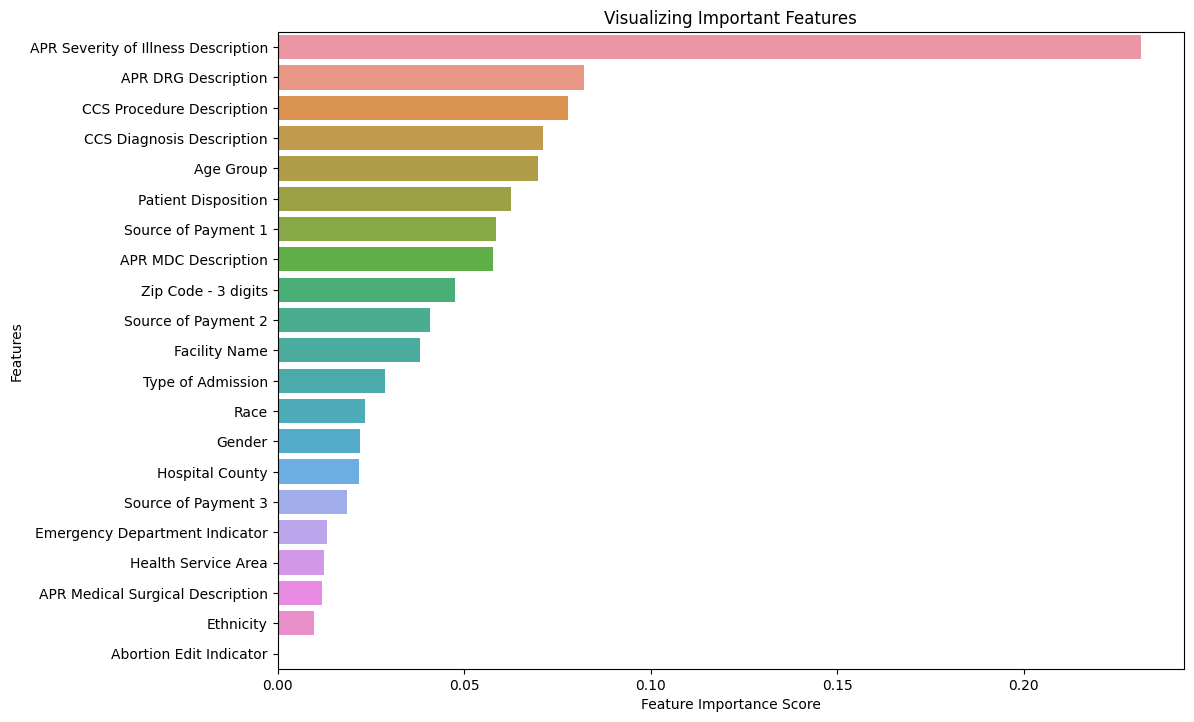

In [33]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [34]:
# declare feature vector and target variable
X = df6.drop(['APR Risk of Mortality','Length of Stay','Facility Name','APR DRG Description','Zip Code - 3 digits'], axis=1)
y = df6['APR Risk of Mortality']

In [35]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [36]:
obj = object
list = ['Length of Stay','Facility Name','APR DRG Description','Zip Code - 3 digits']
for col in list:
  obj.remove(col)
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(obj)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [37]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.7480


In [38]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 2316   588     8    83]
 [  672  3024   219  1831]
 [    7   159 18191  1910]
 [   60  1733  2402  5180]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Extreme       0.76      0.77      0.77      2995
       Major       0.55      0.53      0.54      5746
       Minor       0.87      0.90      0.89     20267
    Moderate       0.58      0.55      0.56      9375

    accuracy                           0.75     38383
   macro avg       0.69      0.69      0.69     38383
weighted avg       0.74      0.75      0.75     38383



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5))
]

# Train and evaluate each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Confusion Matrix for {name}:\n{cm}")
    print(f"Accuracy for {name}: {accuracy}\n")

Confusion Matrix for Logistic Regression:
[[  773    78  1845   299]
 [  161   570  1825  3190]
 [   85   239 18224  1719]
 [   41   713  4708  3913]]
Accuracy for Logistic Regression: 0.6117291509261913

Confusion Matrix for Decision Tree:
[[ 1984   850    12   149]
 [  751  2862   397  1736]
 [   17   359 17514  2377]
 [  156  1972  2684  4563]]
Accuracy for Decision Tree: 0.7014303207148999

Confusion Matrix for Random Forest:
[[ 2337   554     8    96]
 [  670  3026   229  1821]
 [    4   163 18187  1913]
 [   59  1716  2407  5193]]
Accuracy for Random Forest: 0.7488471458718704

